In [1]:
# Notebook to explore more serious convolutional networks 
# i.e. includes analysis of training and test accuracies

In [2]:
# Tried a few things:
# More convolution layers did not increase accuracy
# BatchNorm helps the training initialy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from core_functions import SensorSignals

# Model with usual halving of image size and doubling the depth
class CNN_STANDARD(nn.Module):    
    def __init__(self):
        super(CNN_STANDARD, self).__init__()

        self.conv = nn.Sequential(    # Convolutional part, 3 layers
            nn.Conv1d(1, 4, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(4, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv1d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(        # Fully connected part, 3 layers
            nn.Linear(16 * 4, 256),
            nn.ReLU(),
            nn.Linear(256, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x


class CNN_2(nn.Module):    
    def __init__(self):
        super(CNN_2, self).__init__()

        self.conv = nn.Sequential(    # Convolutional part, 3 layers
            nn.Conv1d(1, 8, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Conv1d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(        # Fully connected part, 3 layers
            nn.Linear(32 * 4, 256),
            nn.ReLU(),
            nn.Linear(256, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x


class CNN_3(nn.Module):    
    def __init__(self):
        super(CNN_3, self).__init__()

        self.conv = nn.Sequential(    # Convolutional part, 3 layers
            nn.Conv1d(1, 16, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(        # Fully connected part, 3 layers
            nn.Linear(64 * 4, 256),
            nn.ReLU(),
            nn.Linear(256, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

    
class CNN_5(nn.Module):    
    def __init__(self):
        super(CNN_5, self).__init__()

        self.conv = nn.Sequential(    # Convolutional part, 3 layers
            nn.Conv1d(1, 4, kernel_size=3, stride=2, padding=1),
            nn.Conv1d(4, 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(4),
            nn.ReLU(),
            nn.Conv1d(4, 8, kernel_size=3, stride=2, padding=1),
            nn.Conv1d(8, 8, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Conv1d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.Conv1d(16, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(        # Fully connected part, 3 layers
            nn.Linear(16 * 4, 256),
            nn.ReLU(),
            nn.Linear(256, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

In [10]:
dataPath = "./second_collection_triggs_rels_32.npz"
S = SensorSignals(dataPath) 
S.split_data()
S.norm_X()
S.set_number_channels(1)
S.setup_tensors()
S.print_shapes()

# for CNN_STANDARD
# lr=5e-3, wd=1e-4
# with BatchNorm1d
# lr=1e-2, wd=1e-3

models = [CNN_2()]
S.train_multiple_models(models, learning_rate=1e-2, weight_decay=1e-3, batch_size=128, max_epochs=50)

Before: 2.9674929531832173
Normalizing dataset by 2.97
After: 1.0
Before: 2.956091263650546
Normalizing dataset by 2.97
After: 0.9961578040074397
Before: 2.973409821018816
Normalizing dataset by 2.97
After: 1.0019938944856641
Using Device:  cpu , dtype:  torch.float32
Raw data shape:  (17089, 32)
Labels shape:  (17089,)
Unique labels:  [0 1 2]
Shape of test set: (2564, 1, 32)
Shape of train set: (12346, 1, 32)
Shape of validation set: (2179, 1, 32)
Fraction of single class in test set:  0.328003120124805
Epoch 1, Batch 1: loss=1.351, train=33.3%, val=34.2%
Epoch 2, Batch 1: loss=0.767, train=68.7%, val=67.9%
Epoch 3, Batch 1: loss=0.620, train=74.6%, val=73.7%
Epoch 4, Batch 1: loss=0.581, train=75.3%, val=75.3%
Epoch 5, Batch 1: loss=0.528, train=76.1%, val=76.1%
Epoch 6, Batch 1: loss=0.489, train=75.8%, val=76.0%
Epoch 7, Batch 1: loss=0.524, train=77.3%, val=77.5%
Epoch 8, Batch 1: loss=0.439, train=78.7%, val=78.1%
Epoch 9, Batch 1: loss=0.507, train=76.5%, val=77.3%
Epoch 10, Bat

Accuracy of test set of best model (idx=0): 80.1%


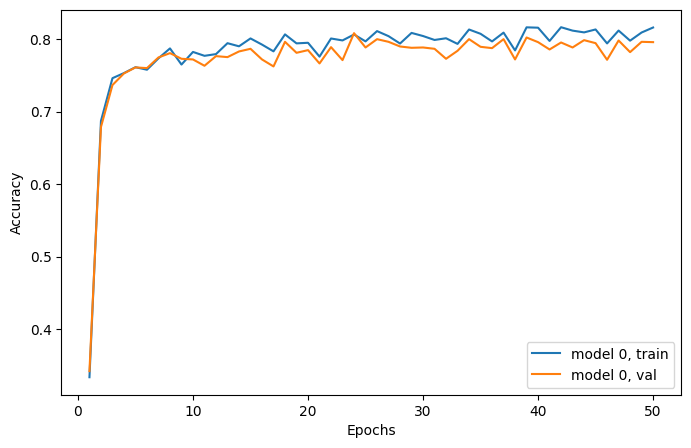

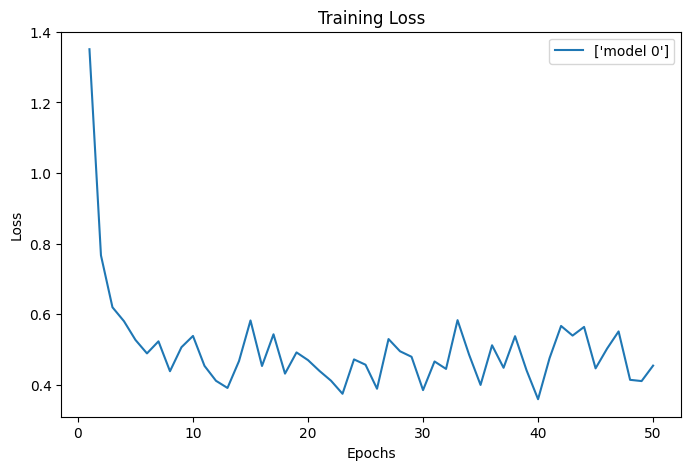

In [11]:
S.plotAcc()
S.plotLosses()
S.bestModelAcc()

In [7]:
from core_functions import SensorSignals
import torch.nn as nn

D = SensorSignals("./second_collection_triggs_rels_32.npz") 
D.split_data()
D.norm_X()
D.set_number_channels(3)
D.setup_tensors()
D.print_shapes()

Before: 2.8850278539471788
Normalizing dataset by 2.89
After: 0.9999999999999999
Before: 2.882816539263377
Normalizing dataset by 2.89
After: 0.9992335205080338
Before: 2.8831798855273916
Normalizing dataset by 2.89
After: 0.9993594625378542
Using Device:  cpu , dtype:  torch.float32
Raw data shape:  (9591, 32)
Labels shape:  (9591,)
Unique labels:  [0 1 2]
Shape of test set: (21585, 3, 32)
Shape of train set: (103935, 3, 32)
Shape of validation set: (18345, 3, 32)
Fraction of single class in test set:  0.3333333333333333


In [8]:
class CNN_7(nn.Module):    
    def __init__(self):
        super(CNN_7, self).__init__()

        self.conv = nn.Sequential(    # Convolutional part, 3 layers
            nn.Conv1d(3, 8, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Conv1d(8, 16, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(),
        )
        self.fc = nn.Sequential(        # Fully connected part, 3 layers
            nn.Linear(32 * 4, 256),
            nn.ReLU(),
            nn.Linear(256, 3)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

models = [CNN_7()]
D.train_multiple_models(models, learning_rate=1e-2, weight_decay=1e-3, batch_size=128, max_epochs=2)

Epoch 1, Batch 1: loss=1.320, train=40.7%, val=40.3%
Epoch 1, Batch 101: loss=0.429, train=81.9%, val=81.8%
Epoch 1, Batch 201: loss=0.411, train=84.5%, val=84.1%
Epoch 1, Batch 301: loss=0.377, train=83.9%, val=82.6%
Epoch 1, Batch 401: loss=0.474, train=84.1%, val=83.2%
Epoch 1, Batch 501: loss=0.358, train=86.1%, val=85.2%
Epoch 1, Batch 601: loss=0.291, train=86.2%, val=85.2%
Epoch 1, Batch 701: loss=0.290, train=86.0%, val=85.0%
Epoch 1, Batch 801: loss=0.297, train=86.4%, val=85.4%
Epoch 2, Batch 1: loss=0.439, train=85.2%, val=84.3%
Epoch 2, Batch 101: loss=0.420, train=86.7%, val=85.5%
Epoch 2, Batch 201: loss=0.308, train=85.3%, val=84.2%
Epoch 2, Batch 301: loss=0.374, train=86.2%, val=85.3%
Epoch 2, Batch 401: loss=0.360, train=86.6%, val=85.4%
Epoch 2, Batch 501: loss=0.340, train=87.0%, val=86.0%
Epoch 2, Batch 601: loss=0.332, train=86.2%, val=85.3%
Epoch 2, Batch 701: loss=0.373, train=87.1%, val=85.7%
Epoch 2, Batch 801: loss=0.385, train=85.6%, val=85.0%
Training Compl

Accuracy of test set of best model (idx=0): 86.4%


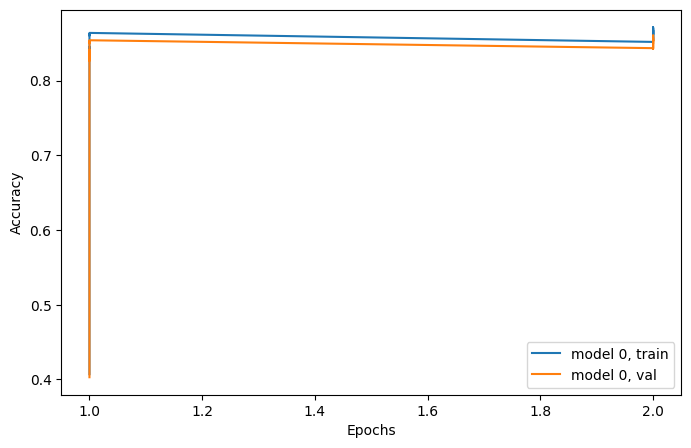

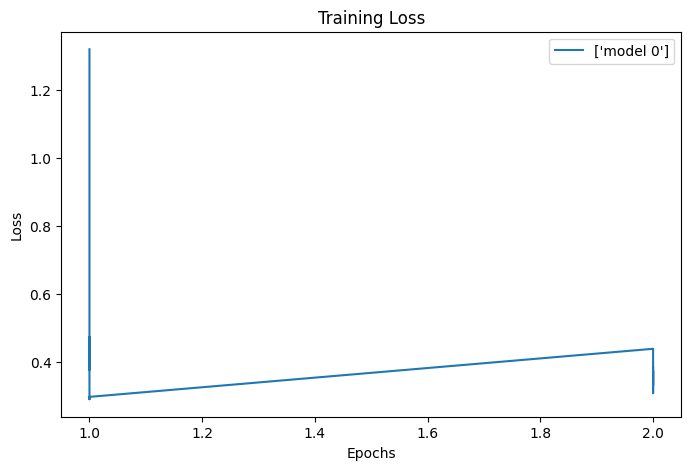

In [9]:
D.plotAcc()
D.plotLosses()
D.bestModelAcc()